## Imports

In [59]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.linear_model import LinearRegression


## Load data

In [44]:
data_xlsx = pd.ExcelFile('data.xlsx')
co2_df = pd.read_excel(data_xlsx, 0)
temp_df = pd.read_excel(data_xlsx, 1)


In [45]:
co2_df.columns = ['year', 'y']
temp_df.columns = ['year', 'y']


## Graphing & Pre-Analysis

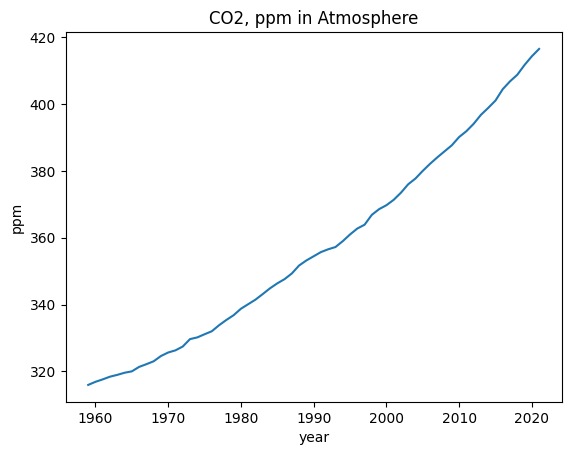

In [54]:
g_co2 = co2_df.plot(x='year', y='y', ylabel='ppm', title='CO2, ppm in Atmosphere', legend=None)


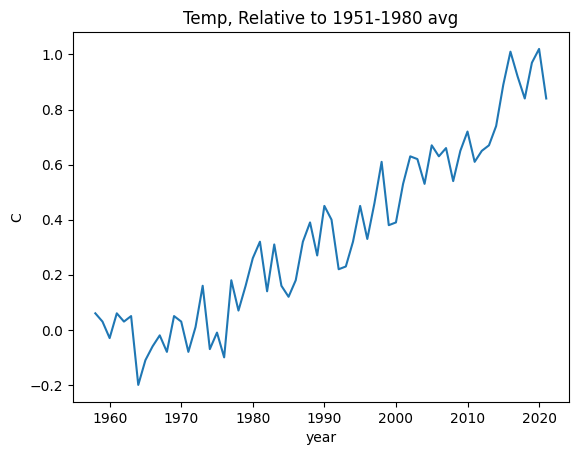

In [55]:
g_temp = temp_df.plot(x='year', y='y', ylabel='C', title='Temp, Relative to 1951-1980 avg', legend=None)


In [51]:
ct_df = pd.concat([co2_df['y'], temp_df['y']], axis=1, keys=['co2', 'temp'])
ct_df = ct_df[:-1]


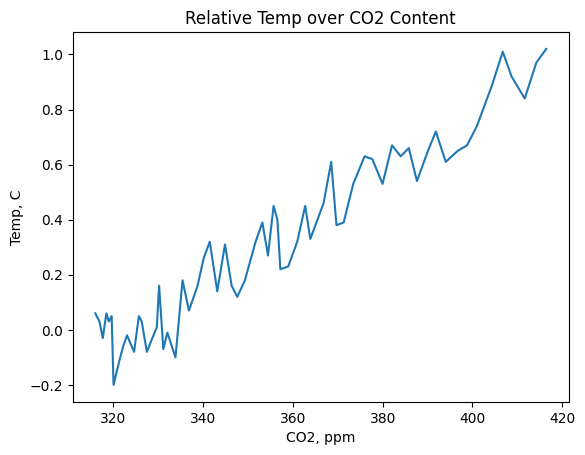

In [56]:
g_ct = ct_df.plot(x='co2', y='temp', xlabel='CO2, ppm', ylabel='Temp, C', title='Relative Temp over CO2 Content', legend=None)


## Simple Bi variate Analysis

In [61]:
m_lr = LinearRegression()
m_lr.fit(ct_df[['co2']], ct_df[['temp']])

pred = m_lr.predict(ct_df[['co2']])


In [71]:
pmcc = ct_df.corr()["temp"][0]
coef = m_lr.coef_[0][0]
itcp = m_lr.intercept_[0]

print(
        f'PMCC: {pmcc} \n'
        f'R^2: {pmcc**2} \n'
        f'Linear Regressed: y = {coef}x {"+" if abs(itcp) == itcp else "-"} {abs(itcp)}'
)


PMCC: 0.9599812208926525 
R^2: 0.9215639444665477 
Linear Regressed: y = 0.010330473207293444x - 3.352746379345213
